In [1]:
from scipy.stats import shapiro, f_oneway, kruskal, ttest_rel, ttest_ind, mannwhitneyu
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.multitest import multipletests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 0.05

In [2]:
def print_test_results(stat, p, alpha=0.05):
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

def print_normality_test_results(data, alpha=0.05):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

# Multivariable Tests With Toy Data

In [3]:
dice_data = [[2, 3, 5, 4, 4, 3], [4, 2, 3, 5, 2, 3], [3, 1, 4, 4, 3, 5]]
dice_data = np.array(dice_data)

for i in range(3):
    print("Mean of dice data %d: %.2f" % (i, np.mean(dice_data[i])))

Mean of dice data 0: 3.50
Mean of dice data 1: 3.17
Mean of dice data 2: 3.33


Statistics=0.960, p=0.820
Sample looks Gaussian (fail to reject H0)
Statistics=0.908, p=0.421
Sample looks Gaussian (fail to reject H0)
Statistics=0.927, p=0.554
Sample looks Gaussian (fail to reject H0)


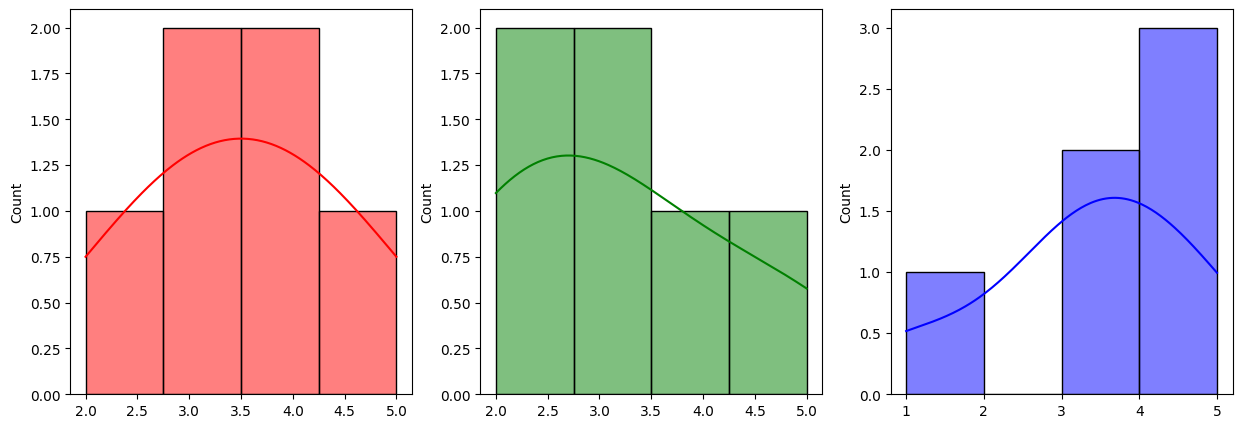

In [4]:
plt.figure(figsize=(15, 5))
colors = ['red', 'green', 'blue']
for i in range(3):
    print_normality_test_results(dice_data[i])    
    plt.subplot(1, 3, i + 1)
    sns.histplot(dice_data[i], color=colors[i], kde=True)

In [5]:
# Multivariable test with normal distributions - ANOVA test 
result = f_oneway(dice_data[0], dice_data[1], dice_data[2])
print_test_results(result.statistic, result.pvalue)

Statistics=0.115, p=0.892
Same distribution (fail to reject H0)


In [6]:
nordic_countries = [['Fi', 'Sw', 'Fi', 'No', 'Sw', 'Fi'], ['No', 'Sw', 'No', 'Fi', 'Fi', 'Fi'], ['Sw', 'Fi', 'No', 'Sw', 'Sw', 'No']]
codes = {'Fi': 0, 'Sw': 1, 'No': 2}

for i in range(3):
    nordic_countries[i] = [codes[x] for x in nordic_countries[i]]
nordic_countries = np.array(nordic_countries)

for i in range(3):
    print("Mean of nordic countries data %d: %.2f" % (i, np.mean(nordic_countries[i])))

Mean of nordic countries data 0: 0.67
Mean of nordic countries data 1: 0.83
Mean of nordic countries data 2: 1.17


Statistics=0.822, p=0.091
Sample looks Gaussian (fail to reject H0)
Statistics=0.775, p=0.035
Sample does not look Gaussian (reject H0)
Statistics=0.866, p=0.212
Sample looks Gaussian (fail to reject H0)


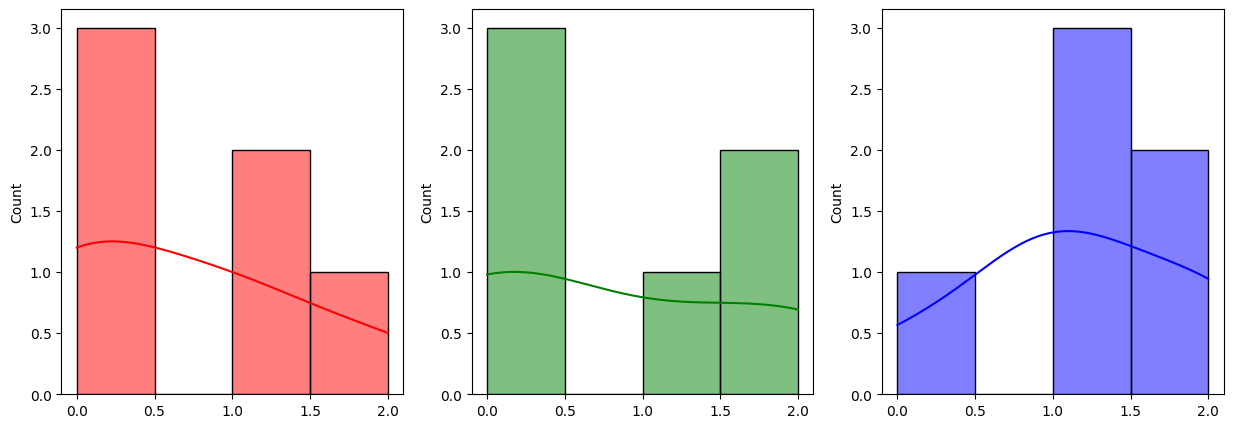

In [7]:
plt.figure(figsize=(15, 5))
colors = ['red', 'green', 'blue']
for i in range(3):
    print_normality_test_results(nordic_countries[i])    
    plt.subplot(1, 3, i + 1)
    sns.histplot(nordic_countries[i], color=colors[i], kde=True)

In [8]:
# Multivariable test with NON normal distributions - Kruskal-Wallis test 
result = kruskal(dice_data[0], dice_data[1], dice_data[2])
print_test_results(result.statistic, result.pvalue)

Statistics=0.350, p=0.839
Same distribution (fail to reject H0)


# Statistial Tests With Simulated Data

In [9]:
data = pd.read_csv('data/simulated-data.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data.shape)
data.head()

(100, 4)


,F,G,H,I
0,27.42,24.02,0.00,9.96
1,-11.29,20.90,4.67,5.66
2,7.26,-20.06,6.34,15.53
3,12.66,36.97,8.12,6.08
4,8.09,-13.34,1.25,10.31


F
Statistics=0.981, p=0.165
Sample looks Gaussian (fail to reject H0)
Mean is 0.65
G
Statistics=0.987, p=0.459
Sample looks Gaussian (fail to reject H0)
Mean is -1.75
H
Statistics=0.994, p=0.941
Sample looks Gaussian (fail to reject H0)
Mean is 3.98
I
Statistics=0.953, p=0.001
Sample does not look Gaussian (reject H0)
Mean is 10.08


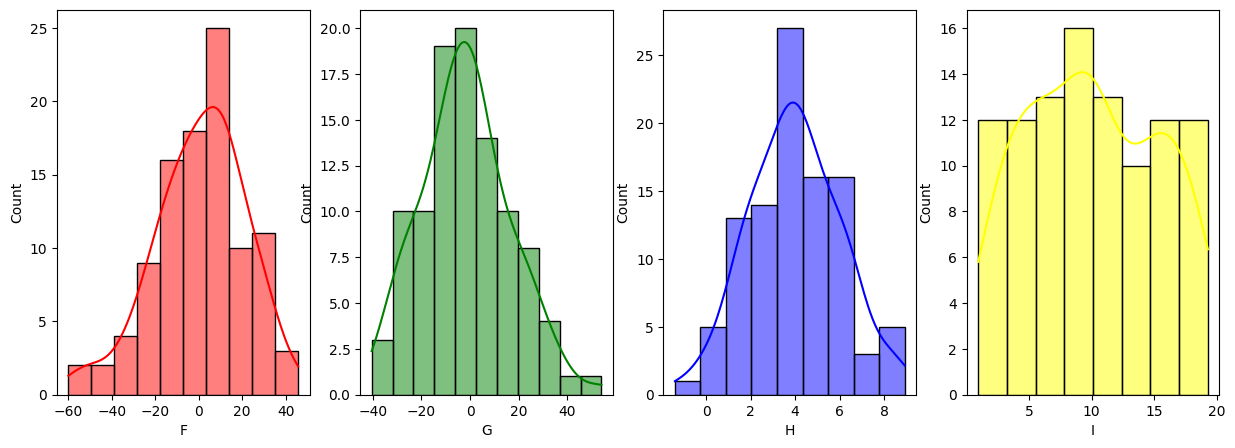

In [10]:
for column in data.columns:
    print(column)
    print_normality_test_results(data[column])
    print("Mean is %.2f" % np.mean(data[column]))

colors = ['red', 'green', 'blue', 'yellow']
plt.figure(figsize=(15, 5))
for i, column in enumerate(data.columns):
    plt.subplot(1, data.shape[1], i + 1)
    sns.histplot(data[column], color=colors[i], kde=True)

In [11]:
# F, G and H multivariate test 
result = f_oneway(data['F'], data['G'], data['H'])
print_test_results(result.statistic, result.pvalue)

# There exists statistically significant evidence that the means of the three groups are different

Statistics=3.247, p=0.040
Different distribution (reject H0)


In [12]:
# F, G and I multivariate test 
result = kruskal(data['F'], data['G'], data['I'])
print_test_results(result.statistic, result.pvalue)

# There exists statistically significant evidence that one group tends to have smaller or larger values than the other groups

Statistics=36.478, p=0.000
Different distribution (reject H0)


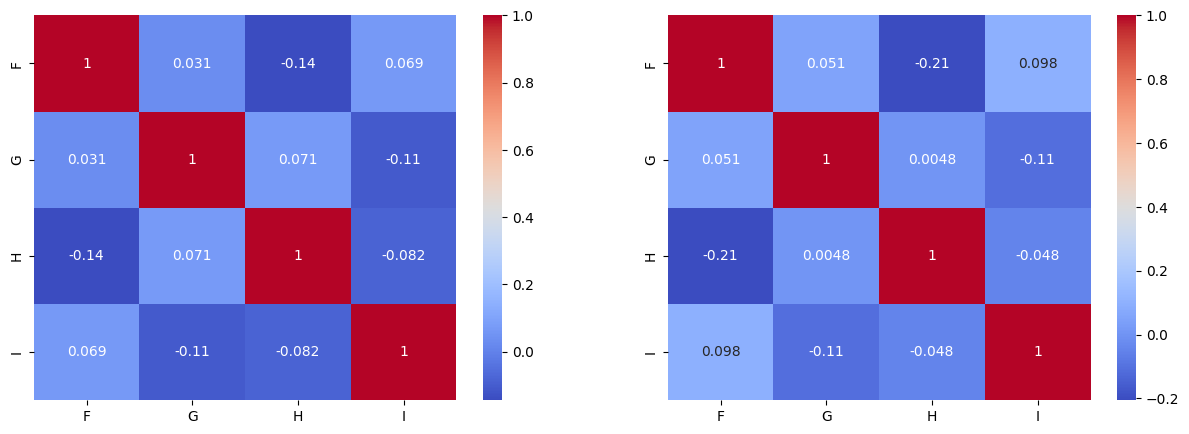

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.subplot(1, 2, 2)
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.show()

In [14]:
# Correlation between F and G
corr, p_value = pearsonr(data['F'], data['G'])
print('Pearson correlation between F and G: %.3f, p=%.3f' % (corr, p_value))
corr, p_value = spearmanr(data['F'], data['G'])
print('Spearman correlation between F and G: %.3f, p=%.3f' % (corr, p_value))

# There is no evidence to claim that F and G are correlated based on both Pearson and Spearman correlation tests

Pearson correlation between F and G: 0.031, p=0.757
Spearman correlation between F and G: 0.051, p=0.617


In [15]:
# Correlation between F and H
corr, p_value = pearsonr(data['F'], data['H'])
print('Pearson correlation between F and H: %.3f, p=%.3f' % (corr, p_value))
corr, p_value = spearmanr(data['F'], data['H'])
print('Spearman correlation between F and H: %.3f, p=%.3f' % (corr, p_value))

# There is evidence to claim that F and H are correlated based on Spearman correlation, but not based on Pearson correlation

Pearson correlation between F and H: -0.145, p=0.150
Spearman correlation between F and H: -0.206, p=0.040


In [16]:
# Correlation between F and I
corr, p_value = pearsonr(data['F'], data['I'])
print('Pearson correlation between F and I: %.3f, p=%.3f' % (corr, p_value))
corr, p_value = spearmanr(data['F'], data['I'])
print('Spearman correlation between F and I: %.3f, p=%.3f' % (corr, p_value))

# There is no evidence to claim that F and I are correlated based on both Pearson and Spearman correlation

Pearson correlation between F and I: 0.069, p=0.495
Spearman correlation between F and I: 0.098, p=0.330


# Gene Expression

In [17]:
genes = pd.read_csv('data/gene-expression.data')
genes.drop(columns=['Unnamed: 0'], inplace=True)
# 100 genes and 40 subjects/samples
print(genes.shape)
genes.head()

(100, 40)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,22.91,24.56,23.38,23.59,24.16,24.51,25.67,22.32,26.08,23.67,...,20.47,19.74,22.05,21.68,22.88,21.40,21.92,21.10,21.57,21.41
1,21.96,23.30,20.80,21.33,21.15,20.16,21.43,22.83,23.01,20.89,...,22.87,21.93,22.08,22.71,22.60,22.33,21.95,22.79,23.03,22.41
2,21.33,24.08,22.05,23.39,22.28,22.87,21.83,23.96,22.46,21.00,...,23.50,22.19,22.02,23.24,22.96,21.31,23.42,22.55,23.14,22.13
3,20.60,20.09,20.90,19.24,20.98,19.90,21.52,19.87,20.90,20.84,...,19.42,17.96,19.83,19.44,19.54,20.77,20.49,20.78,19.36,20.32
4,15.47,15.35,17.06,15.83,15.63,16.78,17.96,14.99,16.31,15.55,...,16.72,15.26,16.95,14.61,15.89,15.65,14.62,16.29,15.57,15.40


In [18]:
control_group = genes.iloc[:, :20]
print(control_group.shape)

treatment_group = genes.iloc[:, 20:]
print(treatment_group.shape)

(100, 20)
(100, 20)


In [19]:
def get_genes_distributions(data):
    normality_results = {}
    for gene in data.index:
        stat, p_value = shapiro(data.loc[gene])
        normality_results[gene] = p_value
    
    normality_df = pd.DataFrame.from_dict(normality_results, orient='index', columns=['p_value'])

    non_normal_genes = normality_df[normality_df['p_value'] < 0.05]

    return non_normal_genes

non_normal_genes_control = get_genes_distributions(control_group)
print(non_normal_genes_control.shape, non_normal_genes_control)

non_normal_genes_treatment = get_genes_distributions(treatment_group)
print(non_normal_genes_treatment.shape, non_normal_genes_treatment)

(4, 1)      p_value
27  0.006374
38  0.019170
87  0.000230
98  0.021782
(8, 1)      p_value
22  0.010676
61  0.028572
64  0.010772
67  0.030204
72  0.018022
86  0.016341
87  0.021609
90  0.028457


In [20]:
# t-test for each gene between control and treatment group
t_test_ind_results = {}
t_test_rel_results = {}

for gene in genes.index:
    stat, p_value = ttest_ind(control_group.loc[gene], treatment_group.loc[gene])
    t_test_ind_results[gene] = p_value
    stat, p_value = ttest_rel(control_group.loc[gene], treatment_group.loc[gene])
    t_test_rel_results[gene] = p_value

t_test_ind_df = pd.DataFrame.from_dict(t_test_ind_results, orient='index', columns=['p_value'])
significant_genes_ind = t_test_ind_df[t_test_ind_df['p_value'] < 0.05]
print("Unpaired t-test")
print(significant_genes_ind.shape)
significant_genes_ind

Unpaired t-test
(16, 1)


,p_value
0,1.842766e-10
5,3.781212e-15
12,9.532600e-16
32,3.451658e-09
35,1.302762e-10
40,4.478914e-14
45,2.833322e-13
49,4.416618e-02
50,2.876642e-09
59,3.385833e-02


In [21]:
t_test_rel_df = pd.DataFrame.from_dict(t_test_rel_results, orient='index', columns=['p_value'])
significant_genes_rel = t_test_rel_df[t_test_rel_df['p_value'] < 0.05]
print("Paired t-test")
print(significant_genes_rel.shape)
significant_genes_rel

Paired t-test
(16, 1)


,p_value
0,3.301215e-08
5,1.060430e-11
12,2.814479e-11
32,1.177130e-07
35,6.609333e-09
38,3.738839e-02
40,1.455324e-08
45,1.169023e-09
50,1.304736e-06
59,3.376155e-02


In [22]:
# Benjamini-Hochberg correction
rejected, p_adjusted, _, _ = multipletests(t_test_ind_df['p_value'], alpha=0.05, method='fdr_bh')
t_test_ind_df['p_value_corrected'] = p_adjusted
rejected, p_adjusted, _, _ = multipletests(t_test_rel_df['p_value'], alpha=0.05, method='fdr_bh')
t_test_rel_df['p_value_corrected'] = p_adjusted

significant_genes_ind_corrected = t_test_ind_df[t_test_ind_df['p_value_corrected'] < 0.05]
print("Unpaired t-test with Benjamini-Hochberg correction")
print(significant_genes_ind_corrected.shape)
print(significant_genes_ind_corrected) 

significant_genes_rel_corrected = t_test_rel_df[t_test_rel_df['p_value_corrected'] < 0.05]
print("Paired t-test with Benjamini-Hochberg correction")
print(significant_genes_rel_corrected.shape)
print(significant_genes_rel_corrected)

Unpaired t-test with Benjamini-Hochberg correction
(12, 2)
         p_value  p_value_corrected
0   1.842766e-10       2.047518e-09
5   3.781212e-15       1.890606e-13
12  9.532600e-16       9.532600e-14
32  3.451658e-09       3.137871e-08
35  1.302762e-10       1.628452e-09
40  4.478914e-14       1.119728e-12
45  2.833322e-13       5.666644e-12
50  2.876642e-09       2.876642e-08
73  5.410951e-13       9.018251e-12
77  4.192547e-03       3.493789e-02
78  8.819081e-15       2.939694e-13
97  1.391385e-11       1.987693e-10
Paired t-test with Benjamini-Hochberg correction
(12, 2)
         p_value  p_value_corrected
0   3.301215e-08       3.668016e-07
5   1.060430e-11       1.060430e-09
12  2.814479e-11       1.198749e-09
32  1.177130e-07       1.177130e-06
35  6.609333e-09       9.441905e-08
40  1.455324e-08       1.819155e-07
45  1.169023e-09       2.338046e-08
50  1.304736e-06       1.186123e-05
73  3.596247e-11       1.198749e-09
77  4.590601e-03       3.825501e-02
78  2.456756e-09    

<AxesSubplot: xlabel='p_value_corrected', ylabel='Count'>

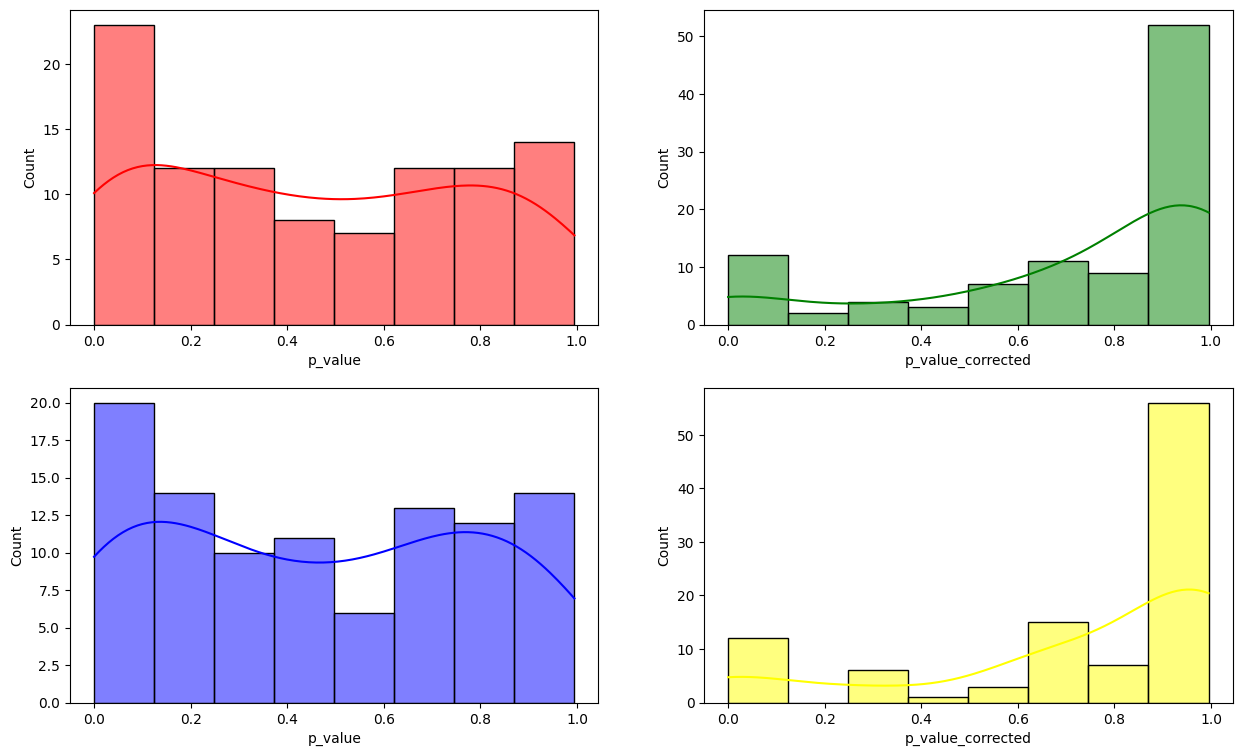

In [23]:
# Histograms of unadjusted and adjusted p-values
plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
sns.histplot(t_test_ind_df['p_value'], color='red', kde=True)
plt.subplot(2, 2, 2)
sns.histplot(t_test_ind_df['p_value_corrected'], color='green', kde=True)
plt.subplot(2, 2, 3)
sns.histplot(t_test_rel_df['p_value'], color='blue', kde=True)
plt.subplot(2, 2, 4)
sns.histplot(t_test_rel_df['p_value_corrected'], color='yellow', kde=True)

# Horse Colic Data

In [24]:
columns = ['surgery', 'age', 'hospital_number', 'rectal_temperature', 'pulse', 'respiratory_rate', 'temperature_of_extremities', 'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_PH', 'rectal_examination', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdominocentesis_appearance', 'abdomcentesis_total_protein', 'outcome', 'surgical_lesion', 'type_of_lesion', 'type_of_lesion_1', 'type_of_lesion_2', 'cp_data']


horse = pd.read_csv('data/horse-colic/horse-colic.data', names=columns, na_values='?', sep='\s+')

print(horse.shape)
horse.head()

(300, 28)


,surgery,age,hospital_number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion,type_of_lesion_1,type_of_lesion_2,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [25]:
horse.isna().sum()

surgery                          1
age                              0
hospital_number                  0
rectal_temperature              60
pulse                           24
respiratory_rate                58
temperature_of_extremities      56
peripheral_pulse                69
mucous_membranes                47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          247
rectal_examination             102
abdomen                        118
packed_cell_volume              29
total_protein                   33
abdominocentesis_appearance    165
abdomcentesis_total_protein    198
outcome                          1
surgical_lesion                  0
type_of_lesion                   0
type_of_lesion_1                 0
type_of_lesion_2                 0
cp_data                          0
dtype: int64

In [26]:
horse.dropna(subset=['surgery', 'rectal_temperature', 'age', 'pulse'], inplace=True)

horses_without_surgery = horse[horse['surgery'] == 2]
horses_with_surgery = horse[horse['surgery'] == 1]

In [27]:
for column in ['rectal_temperature', 'pulse', 'age']:
    print(column)
    print_normality_test_results(horses_without_surgery[column])
    print_normality_test_results(horses_with_surgery[column])

rectal_temperature
Statistics=0.971, p=0.028
Sample does not look Gaussian (reject H0)
Statistics=0.969, p=0.004
Sample does not look Gaussian (reject H0)
pulse
Statistics=0.841, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.919, p=0.000
Sample does not look Gaussian (reject H0)
age
Statistics=0.228, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.363, p=0.000
Sample does not look Gaussian (reject H0)


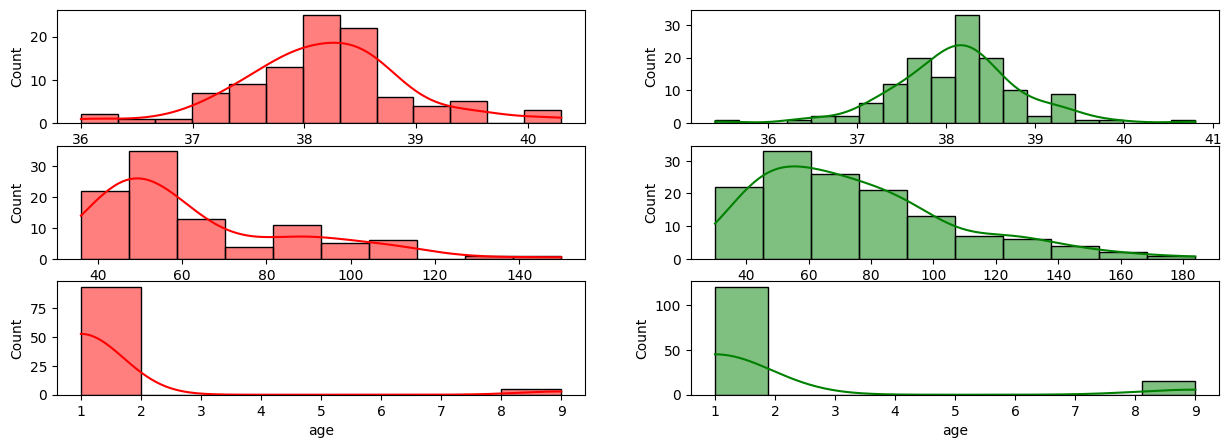

In [28]:
plt.figure(figsize=(15, 5))
colors = ['red', 'green']
i = 1
for column in ['rectal_temperature', 'pulse', 'age']:
    plt.subplot(3, 2, i)
    sns.histplot(horses_without_surgery[column], color=colors[0], kde=True)
    i += 1
    plt.subplot(3, 2, i)
    sns.histplot(horses_with_surgery[column], color=colors[1], kde=True)
    i += 1

In [29]:
# Mann-Whitney U test for rectal temperature between horses with and without surgery
stat, p_value = mannwhitneyu(horses_without_surgery['rectal_temperature'], horses_with_surgery['rectal_temperature'])
print('Unpaired t-test for rectal temperature between horses with and without surgery')
print_test_results(stat, p_value)

Unpaired t-test for rectal temperature between horses with and without surgery
Statistics=6988.000, p=0.463
Same distribution (fail to reject H0)


In [30]:
# Mann-Whitney U test for pulse between horses with and without surgery
stat, p_value = mannwhitneyu(horses_without_surgery['pulse'], horses_with_surgery['pulse'])
print('Unpaired t-test for pulse between horses with and without surgery')
print_test_results(stat, p_value)

Unpaired t-test for pulse between horses with and without surgery
Statistics=5068.500, p=0.002
Different distribution (reject H0)


In [31]:
# Mann-Whitney U test for age between horses with and without surgery
stat, p_value = mannwhitneyu(horses_without_surgery['age'], horses_with_surgery['age'])
print('Unpaired t-test for age between horses with and without surgery')
print_test_results(stat, p_value)

Unpaired t-test for age between horses with and without surgery
Statistics=6217.500, p=0.107
Same distribution (fail to reject H0)
